# A. KNN Regression

* Regression: Prediction

* Supervised learning algorithms: Regression + Classification

In [114]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

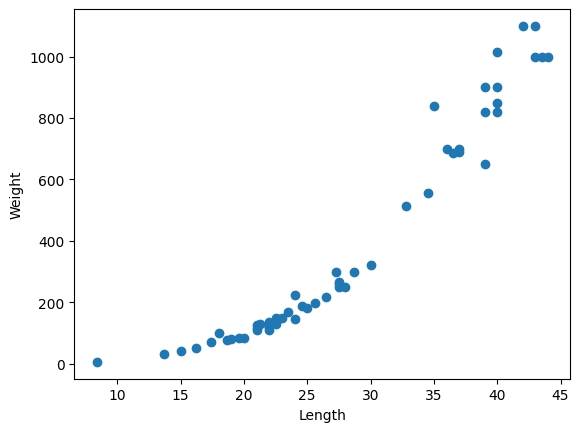

In [115]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()  # As the perch grows longer, its weight naturally increases.


## 1. Train + Test set

In [116]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)  # Setting random_state for reproducibility.
# 1D array size is a tuple with a single element
# For example, the size of [1,2,3] is (3,)
# Let's modify this.


In [117]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)  # The shape of the array is (4,)

(4,)


In [118]:
test_array = test_array.reshape(2, 2)  # If we try (2, 3), it would throw an error.
print(test_array.shape)  # Now the shape is (2, 2)

(2, 2)


In [119]:
train_input = train_input.reshape(-1, 1)  # Using -1 automatically sets the remaining dimension size.
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)  # The shape of the training set is (42, 1) and the test set is (14, 1).

(42, 1) (14, 1)


## 2.Coefficient of Determination(R^2)
* evaluation

In [120]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)  # Train the k-nearest neighbors regression model.


KNeighborsRegressor()

In [121]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)  # Train the KNN regression model.
print(knr.score(test_input, test_target))  # Check the test set score: perfect!


0.992809406101064


0.99 is the above score
Coefficient of Determination (R^2)= 1 - [ Sum of (target - prediction)^2 / Sum of (target - mean)^2 ]

If it is close to 1, the target and prediction are very similar; if it is close to 0, the model performs about as well as predicting the mean.

It is difficult to grasp how good the R^2 score is intuitively. Therefore, we can use the `mean_absolute_error` from the sklearn.metrics package to calculate the average absolute error.


In [122]:
from sklearn.metrics import mean_absolute_error

# Prediction for the test set
test_prediction = knr.predict(test_input)

# Mean absolute error for the test set
mae = mean_absolute_error(test_target, test_prediction)
print(mae)  # The average error is about 19g.


19.157142857142862


We know that the average difference from the target value is around 19g.

## Overfitting and Underfitting
* Overfitting: The model performs well on the training set but poorly on the test set.

* Underfitting: The model performs poorly on both the training and test sets, or the test score is much higher than the training score. This usually means the model is too simple and hasn't learned enough. It can also occur if the training and test data sets are too small.


In [123]:
print(knr.score(train_input, train_target))  # Check the R^2 score for the training model. The training score is lower than the test score (96% compared to 99%), indicating underfitting.


0.9698823289099254


Solution to underfitting: Make the model slightly more complex, i.e., reduce the number of neighbors (k). Let's change it from 5 to 3.


In [124]:
# Set the number of neighbors to 3 instead of 5.
knr.n_neighbors = 3

# Retrain the model
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))  # When we reduced k from 5 to 3, the training R^2 score improved from 96% to 98%.


0.9804899950518966


After reducing the k value, the R^2 score for the training set increased. Now, let's check the test score.


In [125]:
print(knr.score(test_input, test_target))  # The test score dropped slightly from 99% to 97%, but the underfitting issue is resolved!

0.9746459963987609


Conversely, for overfitting, we can make the model less complex by increasing k.


# B. Linear Regression

In [126]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [127]:
from sklearn.model_selection import train_test_split  # Train/test split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)  # Reshape into 2D array
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)  # Set the number of neighbors to 3, as before.

knr.fit(train_input, train_target)  # Train the model.


KNeighborsRegressor(n_neighbors=3)

In [128]:
print(knr.predict([[50]]))  # Use this model to predict the weight of a perch with a length of 50.


[1033.33333333]


The predicted weight is 1033g, but this is much higher than the actual weight.


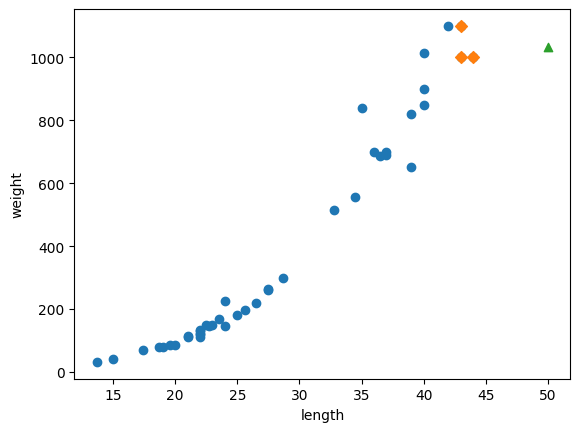

In [129]:
import matplotlib.pyplot as plt

# Find the neighbors of the 50 cm perch
distances, indexes = knr.kneighbors([[50]])

# Plot the scatter plot of the training data
plt.scatter(train_input, train_target)

# Plot the nearest neighbors
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# Plot the 50 cm perch
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


The scatter plot is not wrong. It shows that the weight of the perch increases with length.

Problem: The nearest neighbors to the 50 cm perch are around 45 cm, so the k-nearest neighbors algorithm averages the weights.


In [130]:
print(np.mean(train_target[indexes]))  # The average of the neighbors' weights.


1033.3333333333333


Shall we plot the data again for confirmation?

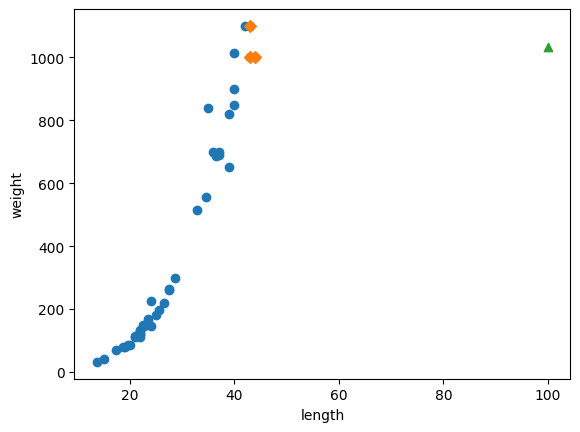

In [131]:
# Find the neighbors of the 100 cm perch
distances, indexes = knr.kneighbors([[100]])

# Plot the scatter plot of the training data
plt.scatter(train_input, train_target)

# Plot the nearest neighbors
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# Plot the 100 cm perch
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


This shows that no matter how large the perch is, the weight prediction won't increase.


## Linear Regression


In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train the linear regression model
lr.fit(train_input, train_target)

# Predict the weight of a 50 cm perch
print(lr.predict([[50]]))

[1241.83860323]


To draw a line, we need the slope and intercept. The model stores these values.


In [133]:
print(lr.coef_, lr.intercept_)  # Coefficient (slope), intercept

[39.01714496] -709.0186449535477


Let's plot the line for lengths between 15 and 50.

Points: (15, 15×39 - 709), (50, 50×39 - 709)


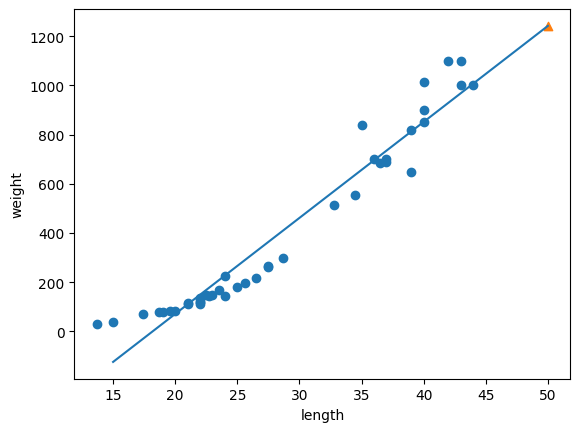

In [134]:
# Plot the scatter plot of the training data
plt.scatter(train_input, train_target)

# Plot the linear regression line for lengths between 15 and 50
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# Plot the 50 cm perch
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

Let's check the R^2 score for both the training and test sets.

In [135]:
print(lr.score(train_input, train_target))  # Training set score
print(lr.score(test_input, test_target))  # Test set score. Since the training score isn't great either, this indicates underfitting.

0.939846333997604
0.8247503123313558


Reducing the value of k increased the R^2 score for the training set. Let's check the test score.


In [136]:
print(knr.score(test_input, test_target))  # The test score dropped slightly from 99 to 97%. Problem solved!

0.9746459963987609


## Polynomial Regression

If you look at the length and weight of the perch, it seems more like a curve than a straight line. Let's try to find the best curve instead of the best straight line.

`column_stack()` stacks two lists side by side. `np.concatenate()` stacks them in one continuous row.


In [137]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [138]:
print(train_poly.shape, test_poly.shape)  # Shape of polynomial features

(42, 2) (14, 2)


In [139]:
lr = LinearRegression()
lr.fit(train_poly, train_target)  # Train the model again with polynomial features.

print(lr.predict([[50**2, 50]]))  # Predict the weight of a 50 cm perch, using both length and squared length.

[1573.98423528]


In [140]:
print(lr.coef_, lr.intercept_)  # Coefficients and intercept for the polynomial regression model

[  1.01433211 -21.55792498] 116.0502107827827


The learned equation is:

weight = 1.01 × length^2 - 21.6 × length + 116.5

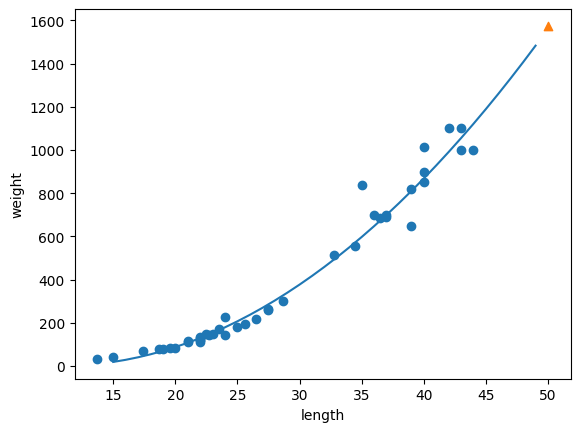

In [141]:
point = np.arange(15, 50)

# Plot the polynomial regression curve for lengths between 15 and 50
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# Plot the 50 cm perch
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [142]:
print(lr.score(train_poly, train_target))  # Training set score
print(lr.score(test_poly, test_target))  # Test set score

0.9706807451768623
0.9775935108325122


* The R^2 scores for both the training and test sets have greatly improved.

* KNN can struggle when it comes to making predictions for values that are distant from the training set. In such cases, linear regression or polynomial regression may be more advantageous.


#3. Regularization


In [143]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)  # Let's load and preview the data from the file.


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [144]:
import numpy as np #target
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])


In [145]:
from sklearn.model_selection import train_test_split  # Split into training and testing sets for perch_full and perch_weights
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


### Sklearn Transformer
1. PolynomialFeatures
Transformer: This provides various classes to create or preprocess features. The fit and transform() methods are provided.


In [146]:
from sklearn.preprocessing import PolynomialFeatures #transformer: PolynomailFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])  # Finds the feature combinations to be created, transform applies to the data
print(poly.transform([[2, 3]]))  # Perform fit and transform consecutively 2개의 특성에(원서ㅗ) 가진 샘플 [2,3]이 6개의 특성을 가진 샘플이 되어습니다. 이게 말이 된다고 생각하나요. 2, 3을 각각 제곱한 4,9가 나오고, ... 1은 왜 나왔을까요? 사실 1의 특성은 곱해지는 계수(절편)로 보면됩니다.

[[1. 2. 3. 4. 6. 9.]]


In [147]:
poly = PolynomialFeatures(include_bias=False)  # include_bias=Fals으로 1이라는 절편을 제거하고 다시 특성을 변환해봅시다.
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [148]:
poly = PolynomialFeatures(include_bias=False)  # Let's apply this method to train_input.
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)  # We can check the size of the array.

(42, 9)


In [149]:
poly.get_feature_names_out()  # This explains how the 9 features were generated.

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [150]:
test_poly = poly.transform(test_input)  # Let's train a multiple regression model.

In [151]:
from sklearn.linear_model import LinearRegression  # Import the linear regression class, and train the previously created train_poly.
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [152]:
print(lr.score(train_poly, train_target))  # Wow, an amazing score! We used not only the perch length but also height and width, and multiplied the features together to create more features.

0.9903183436982125


In [153]:
print(lr.score(test_poly, test_target))  # Let's add more features!

0.9714559911594111


In [154]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)  # We now have 55 features. The number of columns in the train_poly array is the number of features. Let's use this to train the linear regression model again.

(42, 55)


In [155]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))  # Wow, almost a perfect score. What about the test?

0.9999999999996433


In [156]:
print(lr.score(test_poly, test_target))  # It's negative... This is a mess. What went wrong? If you add too many features, the linear model fits the training set perfectly, leading to overfitting. It performs poorly on the test set as a result. The solution? We need to reduce the number of features again.

-144.40579436844948


## Regularization: Regularization prevents the model from overfitting during training.
For a linear model, regularization reduces the magnitude of the coefficients (slopes).
It smoothens the curve, preventing the model from becoming too complex and fitting the noise in the data.


In [157]:
from sklearn.preprocessing import StandardScaler  # Let's use StandardScaler to normalize the data.
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)  # Transform into standard scores~
test_scaled = ss.transform(test_poly)

Linear regression models with added regularization are called Ridge and Lasso.
Both ridge and lasso can be found in the sklearn.linear_model package.


In [158]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))  # The score is lower than it was with regular linear regression.

0.9896101671037343


In [159]:
print(ridge.score(test_scaled, test_target))  # The test set score has improved.

0.9790693977615387


Ridge and Lasso allow you to adjust the amount of regularization using the alpha parameter. The larger the alpha, the stronger the regularization, reducing the coefficients further and leading to more underfitting.


In [160]:
import matplotlib.pyplot as plt
train_score = []  # To find the appropriate alpha, let's plot the R^2 score against different alpha values.
test_score = []  # Let's store the scores for each alpha in the lists using matplotlib.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # Increase alpha by a factor of 10 and train the Ridge regression model for each value, saving the scores in the lists.
for alpha in alpha_list:  # Alpha is not a learned value but something we set, known as a hyperparameter.
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)  # Train the Ridge model
  train_score.append(ridge.score(train_scaled, train_target))  # Store the train and test scores
  test_score.append(ridge.score(test_scaled, test_target))

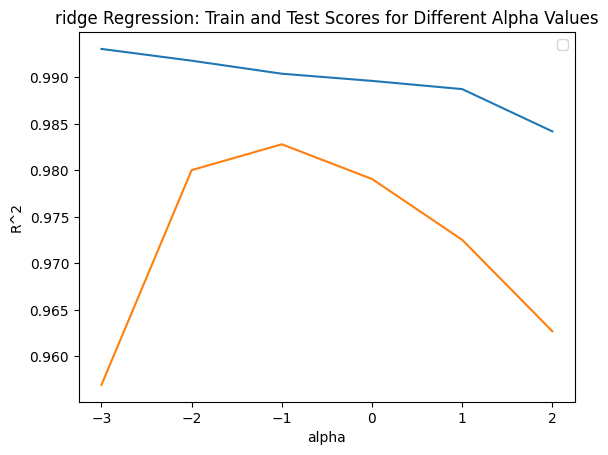

In [161]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.title('ridge Regression: Train and Test Scores for Different Alpha Values')
plt.show()# The blue line is the training set, and the orange line is the test set. The best alpha value is where the two lines are closest, and the test score is highest, which is at -1, or 10^-1.

In [162]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## Lasso Regression.
Lasso is quite similar to Ridge.

In [163]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))  # The score is slightly lower than in regular linear regression.

0.9903815817570367


In [164]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [165]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # Let's train Lasso regression while increasing alpha by a factor of 10.
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter is the number of iterations
  lasso.fit(train_scaled, train_target)  # Train the Lasso model
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


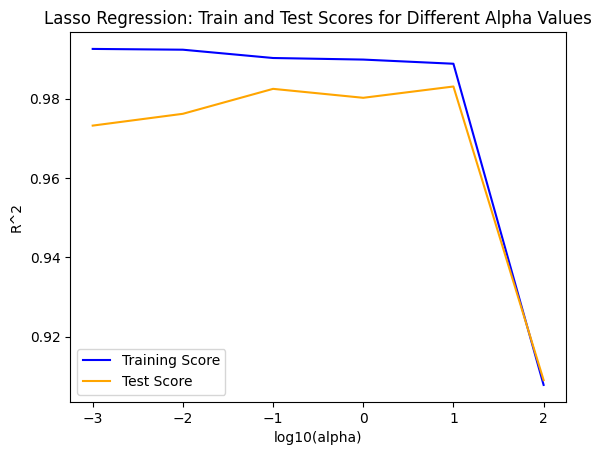

In [166]:
# Plotting the results
plt.plot(np.log10(alpha_list), train_score, label='Training Score', color='blue')
plt.plot(np.log10(alpha_list), test_score, label='Test Score', color='orange')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.legend()
plt.title('Lasso Regression: Train and Test Scores for Different Alpha Values')
plt.show()# The blue line is the training set, and the orange line is the test set. Moving left shows overfitting, and moving right shows underfitting. The ideal alpha is around 1, which is 10^1.

In [167]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))  # Looks good!

0.9888067471131867
0.9824470598706695


Remember that Lasso can completely set some coefficients to zero? The coefficients of the Lasso model are stored in the coef_ attribute.

In [168]:
print(np.sum(lasso.coef_ == 0))  # Wow, 40 coefficients are set to 0! Out of 55 features, 40 have been zeroed out.

40
